Import Libraries

In [36]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np

Loading the MNIST dataset and splitting it into training and testing data
Total img = 70,000
Training data = 60,000
Testing data = 10,000 

In [37]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

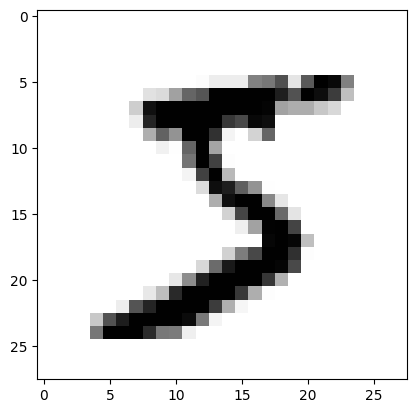

In [38]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

Normalization of Input Data (Data Preprocessing)

In [39]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

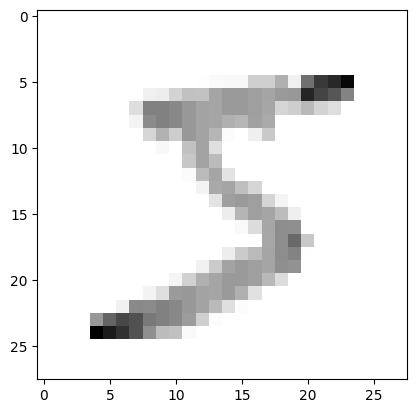

In [40]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

Data Visualisation

In [41]:
def display_example(examples, labels): 
    plt.figure(figsize= (10,10)) 

    for i in range(25):
        index = np.random.randint(0, examples.shape[0]-1)
        img = examples[index]
        label = labels[index]
        
        plt.subplot(5, 5, i+1)
        plt.title(str(label)) 
        plt.tight_layout() 
        plt.imshow(img, cmap = 'gray')
        
    plt.show()


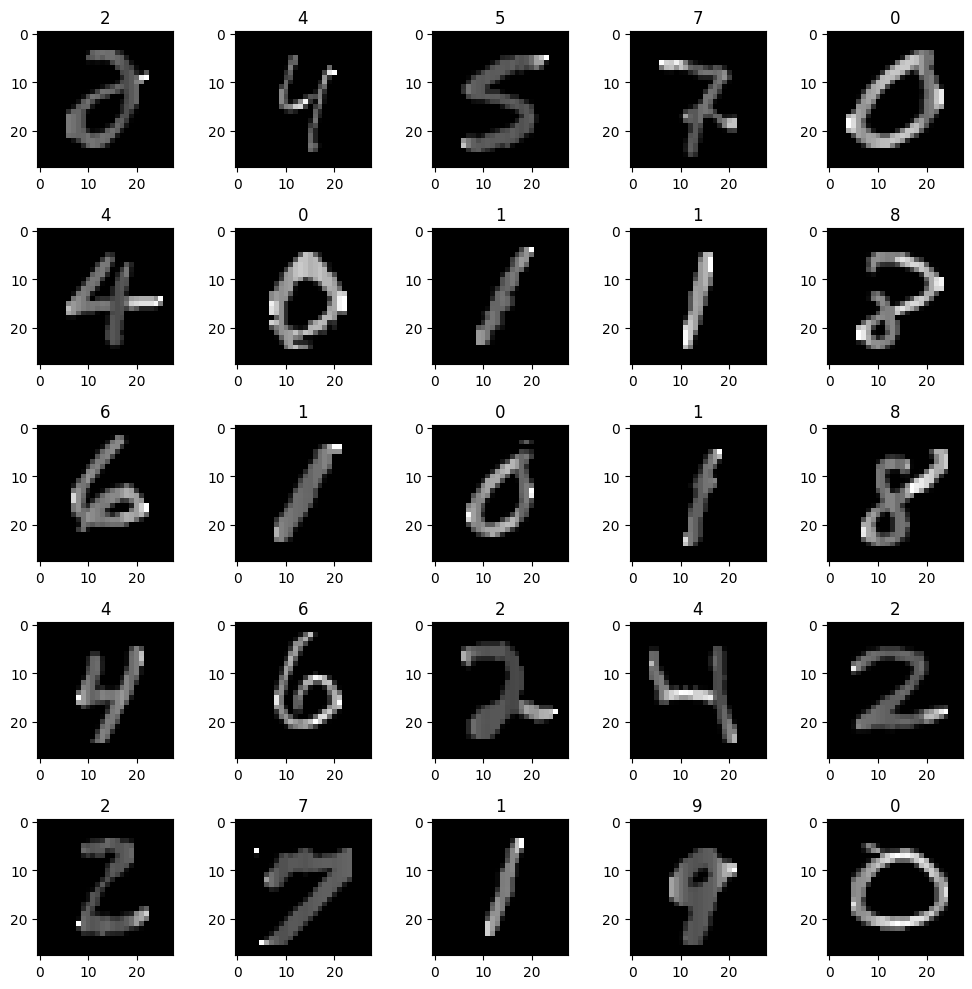

In [42]:
display_example(X_train, y_train)

Resizing the image for convulation

In [43]:
img_size = 28
X_train = np.array(X_train).reshape(-1, img_size, img_size, 1) #increasing kernel size for convulation
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)

print('Training sample dimensions: ', X_train.shape)
print('Testing sample dimensions: ', X_test.shape)

Training sample dimensions:  (60000, 28, 28, 1)
Testing sample dimensions:  (10000, 28, 28, 1)


importing modules from Tensor flow for model trainig

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

Building the Model

In [45]:
model = Sequential()

#First Convulation layer
model.add(Conv2D(32, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation ('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

#2nd convulation layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

#3rd convulation layer
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

#Fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#fully connected layer 2
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))

#fully connected layer 3
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))


In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [47]:
print("Total Trainig Samples: ", len(X_train))

Total Trainig Samples:  60000


Compile the model

In [48]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Training/fitting the model

In [49]:
model.fit(X_train, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.3042 - accuracy: 0.9036 - val_loss: 0.1097 - val_accuracy: 0.9669
Epoch 2/5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0993 - accuracy: 0.9687 - val_loss: 0.0919 - val_accuracy: 0.9729
Epoch 3/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0687 - accuracy: 0.9781 - val_loss: 0.0629 - val_accuracy: 0.9809
Epoch 4/5
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0535 - accuracy: 0.9837 - val_loss: 0.0609 - val_accuracy: 0.9813
Epoch 5/5
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0698 - val_accuracy: 0.9802


Testing model

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss: ", test_loss)
print('Test acc: ', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.0673 - accuracy: 0.9801
Test loss:  0.06731779128313065
Test acc:  0.9800999760627747


Making Predictions

In [51]:
predictions = model.predict([X_test])
print(predictions)

313/313 [==============================] - 1s 4ms/step
[[4.83417395e-08 4.42692544e-06 3.29580798e-05 ... 9.99956369e-01
  3.73392695e-09 1.20434868e-06]
 [6.15952604e-06 4.33957368e-08 9.99976277e-01 ... 5.13666964e-06
  9.02491684e-06 1.53621295e-06]
 [1.21164106e-07 9.99997854e-01 3.88304038e-08 ... 4.30941441e-07
  1.29198256e-07 1.48335673e-08]
 ...
 [7.07157255e-07 7.48285165e-05 1.03573164e-07 ... 4.76413243e-06
  7.96674576e-05 5.43219030e-05]
 [4.30262617e-08 2.02860964e-08 7.56575691e-09 ... 2.01798445e-09
  6.35709002e-05 9.86821362e-08]
 [4.17692490e-06 3.64527040e-08 1.36733703e-07 ... 3.50938034e-09
  4.27344821e-05 4.25804001e-06]]


7


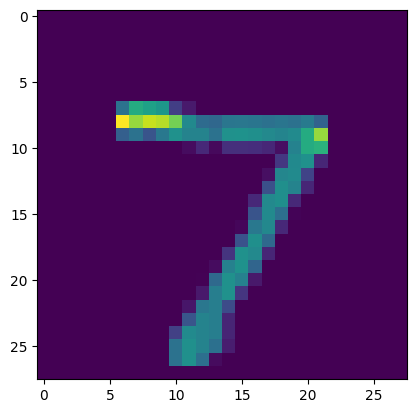

In [52]:
print(np.argmax(predictions[0]))
plt.imshow(X_test[0])

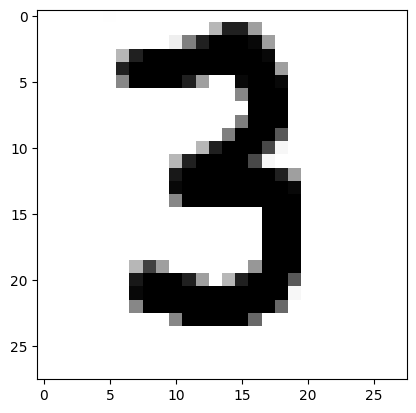

In [53]:
import cv2
img = cv2.imread('digits/digits2.png')
plt.imshow(img)

In [54]:
img.shape

(28, 28, 3)

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(28, 28)

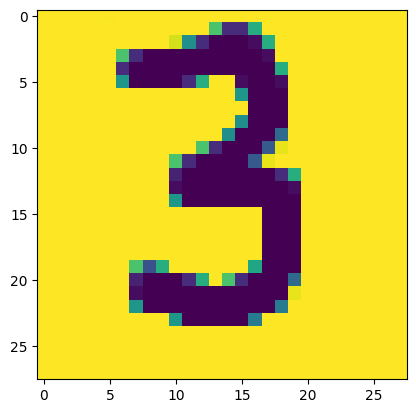

In [56]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
resized.shape
plt.imshow(resized)

In [57]:
new_img = tf.keras.utils.normalize(resized, axis = 1)
new_img = np.array(new_img).reshape(-1, img_size, img_size, 1 )
new_img.shape

(1, 28, 28, 1)

In [58]:
predictions = model.predict(new_img)
print(np.argmax(predictions))

1/1 [==============================] - 0s 95ms/step
0
